In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def compress_image(img, num_colors):
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    kmeans = cv2.kmeans(pixel_values, num_colors, None, criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
    
    colors = kmeans[2]
    color_map = np.zeros((256, 1, 3), dtype=np.uint8)
    for i in range(num_colors):
        color_map[i] = colors[i]
    
    indices = np.zeros((len(pixel_values), 1), dtype=np.uint8)
    for i, (r, g, b) in enumerate(pixel_values):
        index = np.argmin(np.sum((colors - [r, g, b])**2, axis=1))
        indices[i] = index
    
    compressed_img = indices.reshape((img.shape[0], img.shape[1]))
    
    return color_map, compressed_img

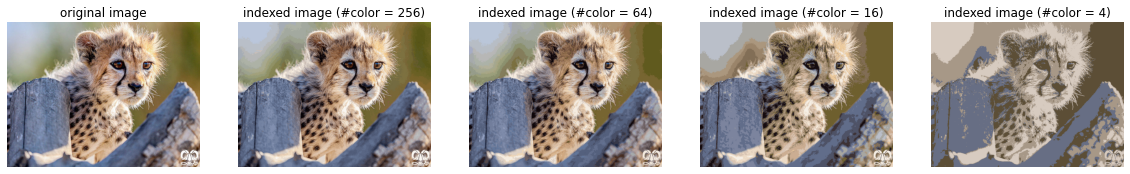

In [26]:
img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.title("original image")
plt.imshow(img)
plt.axis("off")

num_colors = [256, 64, 16, 4]
for index, num_color in enumerate(num_colors):
    img = cv2.imread('image2.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    color_map, compressed_img = compress_image(img, num_color)

    indexed_img = cv2.applyColorMap(compressed_img, color_map)

    plt.subplot(1, 5, index + 2)
    plt.title(f"indexed image (#color = {num_color})")
    plt.imshow(indexed_img)
    plt.axis("off")
plt.show()

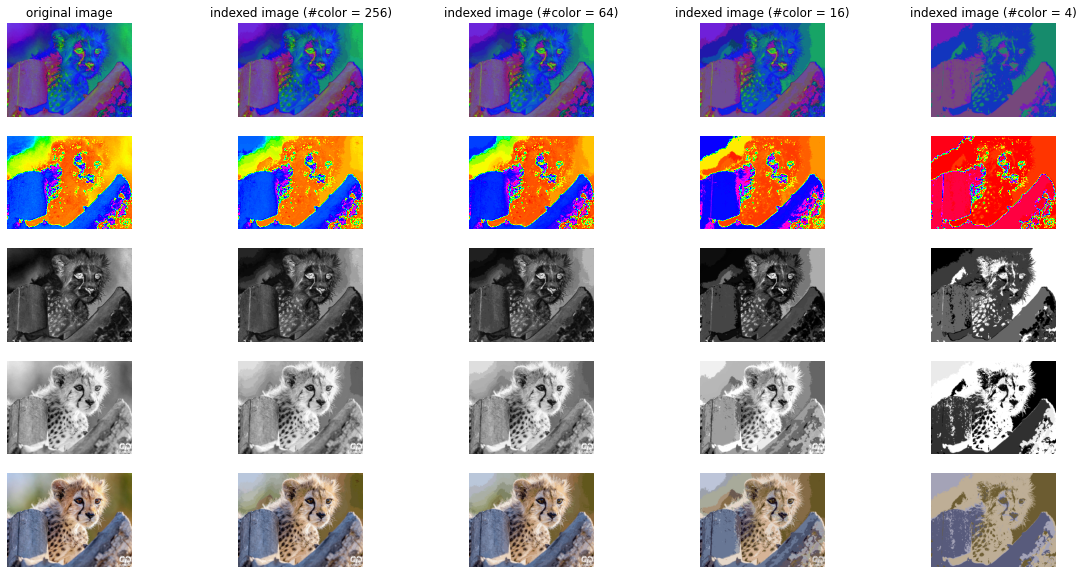

In [28]:
img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(20, 10))
plt.subplot(5, 5, 1)
plt.title("original image")
plt.imshow(img)
plt.axis("off")

h, s, v = cv2.split(img)

plt.subplot(5, 5, 6)
plt.imshow(h, cmap='hsv')
plt.axis("off")

plt.subplot(5, 5, 11)
plt.imshow(s, cmap='gray')
plt.axis("off")

plt.subplot(5, 5, 16)
plt.imshow(v, cmap='gray')
plt.axis("off")

img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

plt.subplot(5, 5, 21)
plt.imshow(img)
plt.axis("off")

num_colors = [256, 64, 16, 4]
for index, num_color in enumerate(num_colors):
    img = cv2.imread('image2.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    color_map, compressed_img = compress_image(img, num_color)

    indexed_img = cv2.applyColorMap(compressed_img, color_map)

    plt.subplot(5, 5, index + 2)
    plt.title(f"indexed image (#color = {num_color})")
    plt.imshow(indexed_img)
    plt.axis("off")

    h, s, v = cv2.split(indexed_img)

    plt.subplot(5, 5, index + 7)
    plt.imshow(h, cmap='hsv')
    plt.axis("off")

    plt.subplot(5, 5, index + 12)
    plt.imshow(s, cmap='gray')
    plt.axis("off")

    plt.subplot(5, 5, index + 17)
    plt.imshow(v, cmap='gray')
    plt.axis("off")

    img = cv2.cvtColor(indexed_img, cv2.COLOR_HSV2RGB)

    plt.subplot(5, 5, index + 22)
    plt.imshow(img)
    plt.axis("off")
plt.show()

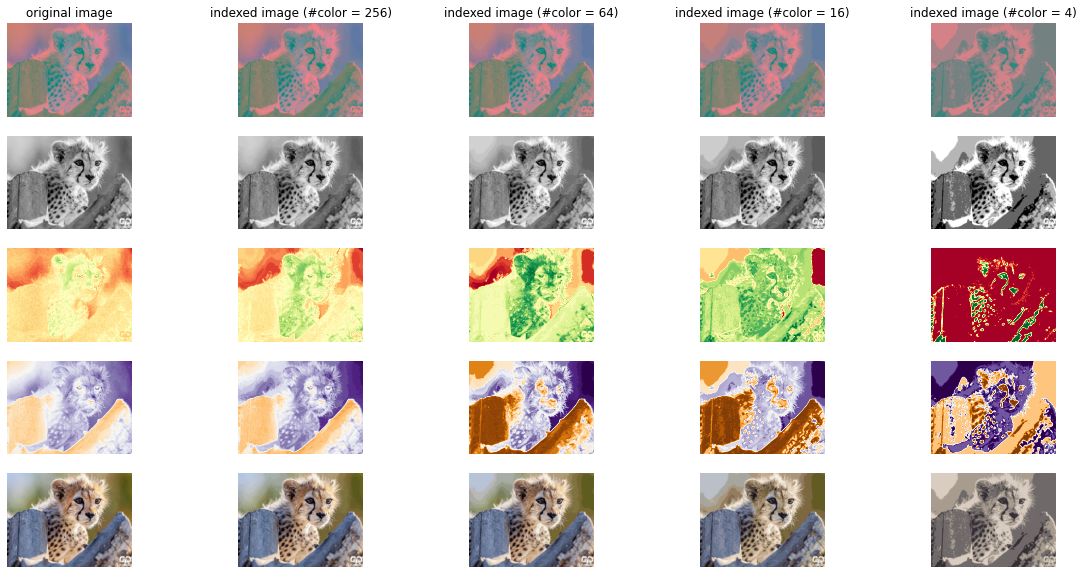

In [30]:
img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

plt.figure(figsize=(20, 10))
plt.subplot(5, 5, 1)
plt.title("original image")
plt.imshow(img)
plt.axis("off")

L, a, b = cv2.split(img)

plt.subplot(5, 5, 6)
plt.imshow(L, cmap='gray')
plt.axis("off")

plt.subplot(5, 5, 11)
plt.imshow(a, cmap='RdYlGn')
plt.axis("off")

plt.subplot(5, 5, 16)
plt.imshow(b, cmap='PuOr')
plt.axis("off")

img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

plt.subplot(5, 5, 21)
plt.imshow(img)
plt.axis("off")

num_colors = [256, 64, 16, 4]
for index, num_color in enumerate(num_colors):
    img = cv2.imread('image2.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    color_map, compressed_img = compress_image(img, num_color)

    indexed_img = cv2.applyColorMap(compressed_img, color_map)

    plt.subplot(5, 5, index + 2)
    plt.title(f"indexed image (#color = {num_color})")
    plt.imshow(indexed_img)
    plt.axis("off")

    L, a, b = cv2.split(indexed_img)

    plt.subplot(5, 5, index + 7)
    plt.imshow(L, cmap='gray')
    plt.axis("off")

    plt.subplot(5, 5, index + 12)
    plt.imshow(a, cmap='RdYlGn')
    plt.axis("off")

    plt.subplot(5, 5, index + 17)
    plt.imshow(b, cmap='PuOr')
    plt.axis("off")

    img = cv2.cvtColor(indexed_img, cv2.COLOR_LAB2RGB)

    plt.subplot(5, 5, index + 22)
    plt.imshow(img)
    plt.axis("off")
plt.show()

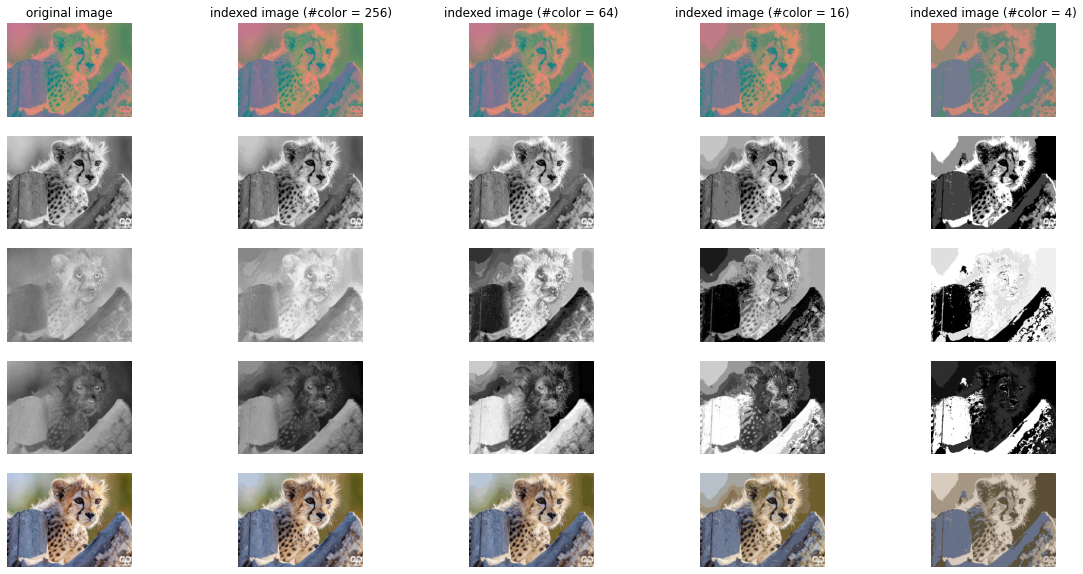

In [31]:
img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

plt.figure(figsize=(20, 10))
plt.subplot(5, 5, 1)
plt.title("original image")
plt.imshow(img)
plt.axis("off")

Y, Cb, Cr = cv2.split(img)
cv2.normalize(Y, Y, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(Cb, Cb, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(Cr, Cr, 0, 255, cv2.NORM_MINMAX)

plt.subplot(5, 5, 6)
plt.imshow(Y, cmap='gray')
plt.axis("off")

plt.subplot(5, 5, 11)
plt.imshow(Cb, cmap='gray')
plt.axis("off")

plt.subplot(5, 5, 16)
plt.imshow(Cr, cmap='gray')
plt.axis("off")

img = cv2.cvtColor(img, cv2.COLOR_YCrCb2RGB)

plt.subplot(5, 5, 21)
plt.imshow(img)
plt.axis("off")

num_colors = [256, 64, 16, 4]
for index, num_color in enumerate(num_colors):
    img = cv2.imread('image2.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    color_map, compressed_img = compress_image(img, num_color)

    indexed_img = cv2.applyColorMap(compressed_img, color_map)

    plt.subplot(5, 5, index + 2)
    plt.title(f"indexed image (#color = {num_color})")
    plt.imshow(indexed_img)
    plt.axis("off")

    Y, Cb, Cr = cv2.split(indexed_img)
    cv2.normalize(Y, Y, 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(Cb, Cb, 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(Cr, Cr, 0, 255, cv2.NORM_MINMAX)

    plt.subplot(5, 5, index + 7)
    plt.imshow(Y, cmap='gray')
    plt.axis("off")

    plt.subplot(5, 5, index + 12)
    plt.imshow(Cb, cmap='gray')
    plt.axis("off")

    plt.subplot(5, 5, index + 17)
    plt.imshow(Cr, cmap='gray')
    plt.axis("off")

    img = cv2.cvtColor(indexed_img, cv2.COLOR_YCrCb2RGB)

    plt.subplot(5, 5, index + 22)
    plt.imshow(img)
    plt.axis("off")
plt.show()